In [29]:
# Importaciones de bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import numpy as np

data = pd.read_excel('df.xlsx')
data.head()

,w,sigma,u,e,material
0,9.424778e+08,0.000000e+00,0.000001,8.841941e-12,Dielectrico Perfecto
1,6.283185e+06,0.000000e+00,0.000001,7.161972e-10,Dielectrico Perfecto
2,1.570796e+10,1.099557e+11,0.000001,6.896714e-10,Buen Conductor
3,1.884956e+07,1.500000e+04,0.000001,2.829421e-11,Buen Conductor
4,6.283185e+06,4.000000e+00,0.000001,7.161972e-10,Buen Conductor


In [30]:
# Filtrando los datos para diferentes categorías de materiales
data_buen_conductor = data[data['material'] == 'Buen Conductor']
data_dielectrico_con_perdidas = data[data['material'] == 'Dielectrico con Perdidas']

In [31]:
# Preparando los datos para el entrenamiento de los modelos
X_buen_conductor = data_buen_conductor[['w', 'sigma', 'e']].values
y_buen_conductor = data_buen_conductor['u'].values
X_train_buen_conductor, X_test_buen_conductor, y_train_buen_conductor, y_test_buen_conductor = train_test_split(X_buen_conductor, y_buen_conductor, test_size=0.2, random_state=42)

In [32]:
X_dielectrico_con_perdidas = data_dielectrico_con_perdidas[['w', 'sigma', 'e']].values
y_dielectrico_con_perdidas = data_dielectrico_con_perdidas['u'].values
X_train_dielectrico_con_perdidas, X_test_dielectrico_con_perdidas, y_train_dielectrico_con_perdidas, y_test_dielectrico_con_perdidas = train_test_split(X_dielectrico_con_perdidas, y_dielectrico_con_perdidas, test_size=0.2, random_state=42)

In [33]:
# Escalando las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_buen_conductor_scaled = scaler.fit_transform(X_train_buen_conductor)
X_test_buen_conductor = scaler.transform(X_test_buen_conductor)
X_train_scaled = scaler.fit_transform(X_train_dielectrico_con_perdidas)
X_test_scaled = scaler.transform(X_test_dielectrico_con_perdidas)

In [34]:
# Modelo de Regresión Lineal para Buen Conductor
model_buen_conductor = LinearRegression()
model_buen_conductor.fit(X_train_buen_conductor_scaled, y_train_buen_conductor)

# Modelo de Regresión Lineal para Dielectrico con Perdidas
model_dielectrico_con_perdidas = DecisionTreeRegressor()
model_dielectrico_con_perdidas.fit(X_train_dielectrico_con_perdidas, y_train_dielectrico_con_perdidas)

DecisionTreeRegressor()

In [35]:
y_pred_buen_conductor = model_buen_conductor.predict(X_test_buen_conductor)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test_buen_conductor, y_pred_buen_conductor)
# El MSE mide la calidad del estimador; es siempre no negativo, y los valores más cercanos a cero son mejores.

# Calcular el coeficiente de determinación (R^2 Score)
r2_score_s = r2_score(y_test_buen_conductor, y_pred_buen_conductor)
# Varía entre 0 y 100%. 100% indica que el modelo explica toda la variabilidad de la variable de respuesta.

print("R2 Score (Dielectrico con Perdidas):", r2_score_s)
print("MSE (Dielectrico con Perdidas):", mse)

R2 Score (Dielectrico con Perdidas): 0.8720498314813616
MSE (Dielectrico con Perdidas): 1.7368815356488488e-12


In [36]:
y_pred_dielectrico_con_perdidas = model_dielectrico_con_perdidas.predict(X_test_dielectrico_con_perdidas)
mse_dielectrico_con_perdidas = mean_squared_error(y_test_dielectrico_con_perdidas, y_pred_dielectrico_con_perdidas)
r2_score_dielectrico_con_perdidas = r2_score(y_test_dielectrico_con_perdidas, y_pred_dielectrico_con_perdidas)

# Continuación de tu código para imprimir las métricas
print("R2 Score (Dielectrico con Perdidas):", r2_score_dielectrico_con_perdidas)
print("MSE (Dielectrico con Perdidas):", mse_dielectrico_con_perdidas)

R2 Score (Dielectrico con Perdidas): 0.9998237458462136
MSE (Dielectrico con Perdidas): 4.731584559212142e-12


In [37]:
import numpy as np
from sympy import Eq, symbols, latex, I
from IPython.display import display, Math

def metodo_gauss_seidel(w, sigma, u, e, Eo, alpha_inicial=1.0, beta_inicial=1.0, max_iter=1000, tol=1e-6):
    tan = sigma / (w * e)
    alpha = alpha_inicial
    beta = beta_inicial
    
    # Verificar si es un buen conductor
    if tan > 25:  # sigma / (w * e) >> 1
        alpha = beta = np.sqrt((u * w * sigma)/(2))
        eta = np.pi/4
    else:
        for i in range(max_iter):
            # Guardar valores antiguos para verificar la convergencia
            alpha_antiguo = alpha
            beta_antiguo = beta

            # Actualizar alpha usando el valor actual de beta
            alpha = w * sigma * u / (2 * beta)
            
            # Actualizar beta usando el nuevo valor de alpha
            beta = (alpha**2 + w**2 * u * e)**0.5

            # Verificar la convergencia
            if abs(alpha - alpha_antiguo) < tol and abs(beta - beta_antiguo) < tol:
                eta = 0.5*np.arctan(tan)
                break

    
    # Variables fuera de la condición
    velocidad_propagacion = w/beta
    longitud_onda = (2*np.pi*velocidad_propagacion)/w
    modulo_impedancia = (np.sqrt(u/e))/((1+tan**2)**0.25)
    impedancia_real = modulo_impedancia*np.cos(eta)
    impedancia_imaginaria = modulo_impedancia*np.sin(eta)
    ecuacion_E = "E(z, t) = {} \cdot e^{{-{} z}} \cdot \cos({}t-{} z) \mathbf{{ax}}".format(
        Eo, round(alpha, 4), round(w, 4), round(beta, 4))
    ecuacion_H = "H(z, t) = {} \cdot e^{{-{} z}} \cdot \cos({}t-{} z - {}) \mathbf{{ay}}".format(
        round(Eo/modulo_impedancia, 4), round(alpha, 4), round(w, 4), round(beta, 4), round(eta, 4))

    
    return {
        'alpha': alpha,
        'beta': beta,
        'velocidad_propagacion': velocidad_propagacion,
        'longitud_onda': longitud_onda,
        'impedancia_real': impedancia_real,
        'impedancia_imaginaria': impedancia_imaginaria,
        'ecuacion_E': ecuacion_E,
        'ecuacion_H': ecuacion_H
    }

def obtener_u(w, sigma, e, model_buen_conductor=model_buen_conductor, model_dielectrico_con_perdidas=model_dielectrico_con_perdidas, scaler=scaler):
    u_0 = 4 * np.pi * 1e-7  # Permeabilidad magnética en el vacío

    if sigma == 0:
        return u_0
    else:
        sigma_we = sigma / (w * e)
        # Escalar las características antes de hacer predicciones
        if sigma_we > 25:
            scaled_features = scaler.transform([[w, sigma, e]])
            return model_buen_conductor.predict(scaled_features)[0]
        else:
            return model_dielectrico_con_perdidas.predict([[w, sigma, e]])[0]

def imprimir_resultados(resultados):
    display(Math(r'\alpha = {} \, \text{{Np/m}}'.format(resultados['alpha'])))
    display(Math(r'\beta = {} \, \text{{rad/m}}'.format(resultados['beta'])))
    display(Math(r'v_p = {} \, \text{{m/s}}'.format(resultados['velocidad_propagacion'])))
    display(Math(r'\lambda = {} \, \text{{m}}'.format(resultados['longitud_onda'])))
    display(Math(r'\eta = {} + j{} \, \Omega'.format(resultados['impedancia_real'], resultados['impedancia_imaginaria'])))
    display(Math(resultados['ecuacion_E'] + r' \, \text{V/m}'))
    display(Math(resultados['ecuacion_H'] + r' \, \text{A/m}'))

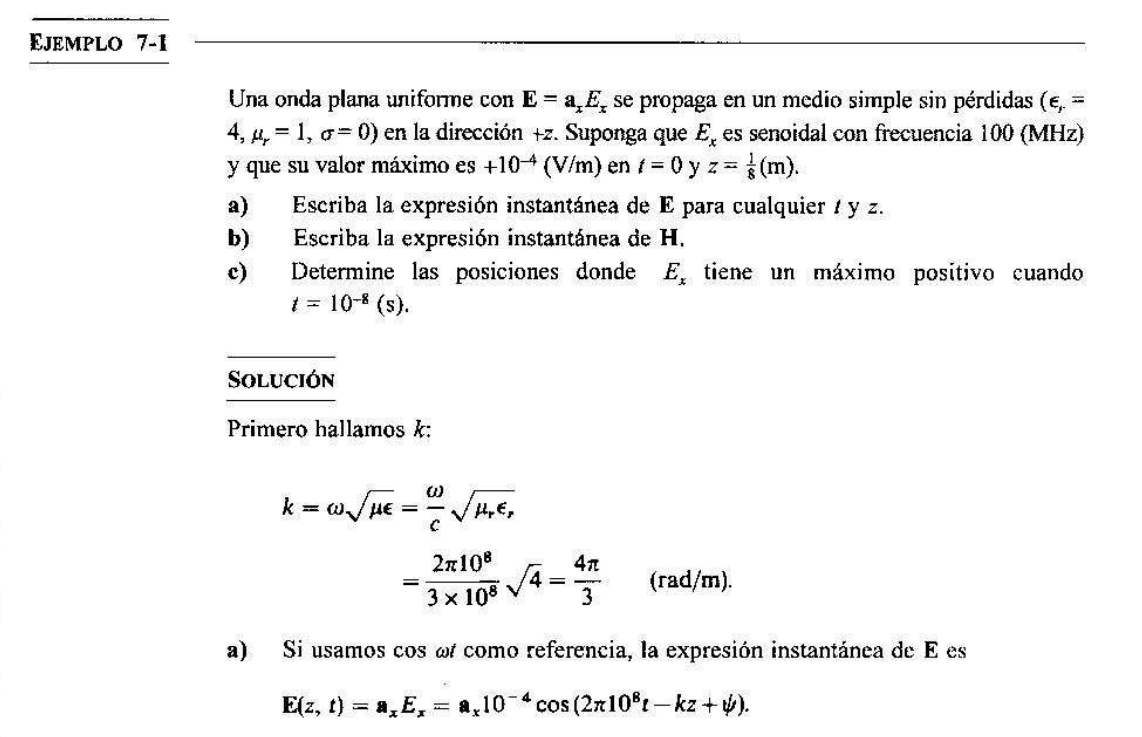
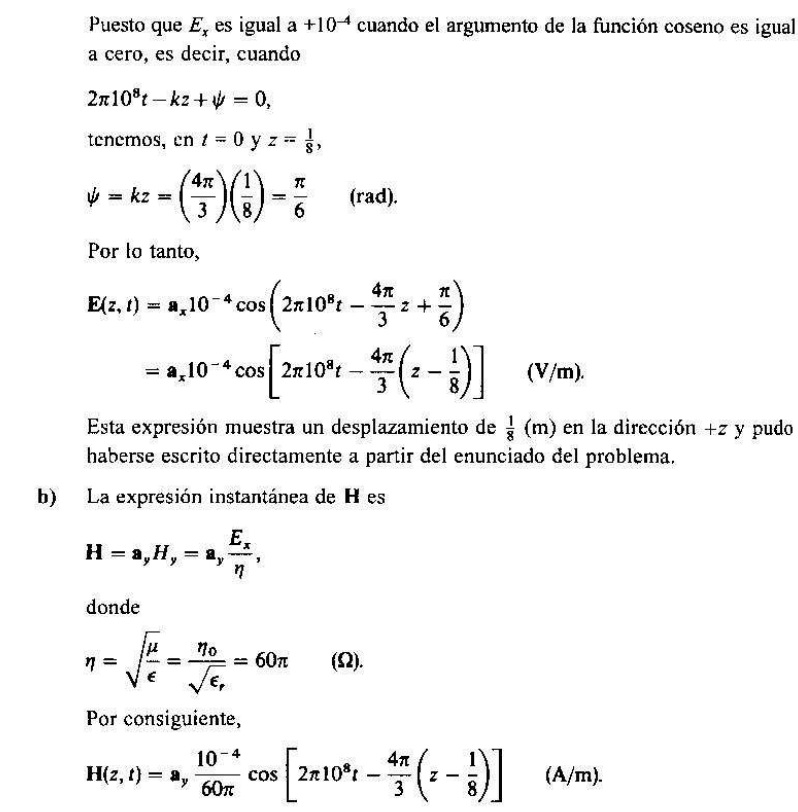

In [38]:
# Prueba Dielectrico Perfecto
Eo = 1
w = np.pi*1e8*2
e = (4*1e-9)/(36*np.pi)
sigma = 0
u = obtener_u(w,sigma,e)

print("Resultados para un Dielectrico Perfecto")
resultados_dielectrico = metodo_gauss_seidel(w, sigma, u, e, Eo)
imprimir_resultados(resultados_dielectrico)
print("\n\n")

Resultados para un Dielectrico Perfecto


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

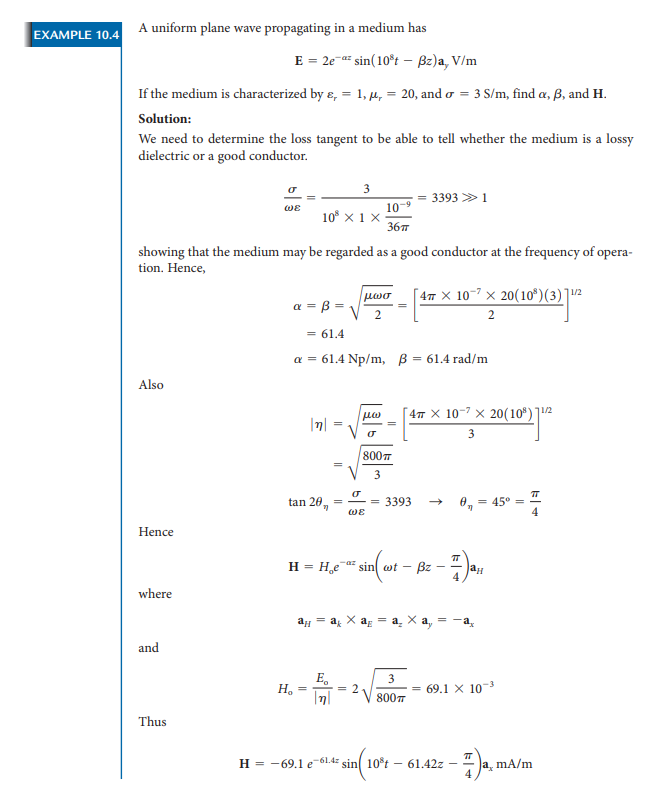

In [39]:
# Prueba Buen conductor
Eo = 2
w = 1e8
e = (1e-9)/(36*np.pi)
sigma = 3
u = obtener_u(w,sigma,e)

print("Resultados para un buen conductor")
resultados_dielectrico = metodo_gauss_seidel(w, sigma, u, e, Eo)
imprimir_resultados(resultados_dielectrico)
print("\n\n")

Resultados para un buen conductor


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

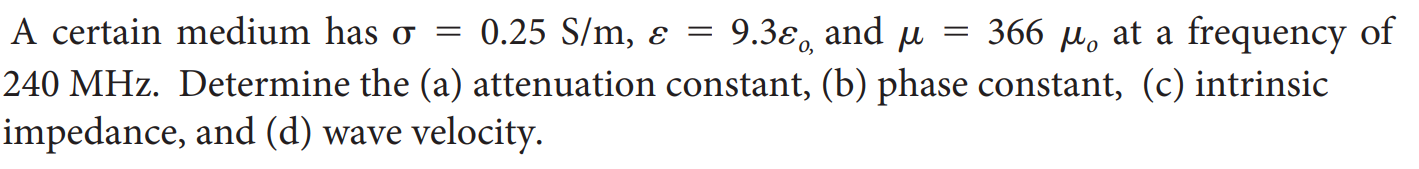

$$
\frac{\sigma}{\omega \epsilon} = 2.016 \, \text{rad}
$$

$$
\text{Para calcular la constante de atenuación (}\alpha\text{):} \\
$$

$$
\alpha = \omega \sqrt{\frac{\mu \epsilon}{2}} \left[ \sqrt{1 + \left(\frac{\sigma}{\omega \epsilon}\right)^2} - 1 \right]^{\frac{1}{2}} \\
$$

$$
\alpha = 231.889 \, \text{Np/m} \\
$$
$$
\text{Para calcular la constante de fase (}\beta\text{):} \\
$$

$$
\beta = \omega \sqrt{\frac{\mu \epsilon}{2}} \left[ \sqrt{1 + \left(\frac{\sigma}{\omega \epsilon}\right)^2} + 1 \right]^{\frac{1}{2}}  \\
$$
$$
\beta = 373.863 \, \text{rad/m} \\
$$
$$
\text{Para calcular la impedancia intrínseca (}\eta\text{):} \\
$$
$$
\left| \eta \right| = \frac{\sqrt{\frac{\mu}{\epsilon}}}{(1+(\frac{\sigma}{\omega \epsilon})^2)^{1/4}} \\
$$
$$
\left| \eta \right| = 1576.5 \, \Omega \\
$$
$$
\tan{2\theta_n} = \frac{\sigma}{\omega \epsilon} \\
$$
$$
\theta_n = 0.555 \, \text{rad} \\
$$
$$
\eta = 1339.71 + j830.956 \, \Omega
$$

In [40]:
# Prueba dielectrico con perdida
Eo = 1
w = 240*2*np.pi*1e6
sigma = 0.25
e = (9.3*1e-9)/(36*np.pi)
u = obtener_u(w,sigma,e)
print("Resultados para un dielectrico con perdida")
resultados_conductor = metodo_gauss_seidel(w, sigma, u, e, Eo)
imprimir_resultados(resultados_conductor)

Resultados para un dielectrico con perdida


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

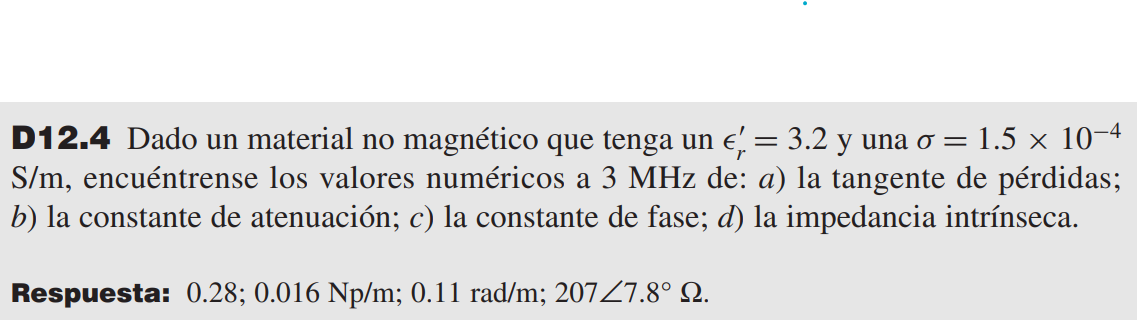

In [42]:
Eo = 1
w = 3*2*np.pi*1e6
sigma = 1.5*1e-4
e = (3.2*1e-9)/(36*np.pi)
u = obtener_u(w,sigma,e)

print("Resultados para un dielectrico con perdida")
resultados_conductor = metodo_gauss_seidel(w, sigma, u, e, Eo)
imprimir_resultados(resultados_conductor)

Resultados para un dielectrico con perdida


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>